# Plot diagrams


In [65]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

In [66]:
metric_file_root_path = "../runs/"
x_value_order = ["1", "3", "10", "30", "100", "All"]
x_axis_title = "N.o. samples per class"
y_axis_title = "Macro F1 score"
score_column = "f1_macro"

aggregating_configs = {
    "Random": r"(?i)random.+",
    # "ImageNet SL": r"(?i)imagenet",
    # "ImageNet SL V1": r"(?i)imagenet_v1",
    # "ImageNet SL V2": r"(?i)imagenet_v2",
    # "ImageNet SL V3": r"(?i)imagenet_v3",
    # "ImageNet SSL": r"(?i)imagenet_ssl",
    "PDDD": r"(?i)pddd.*",
    # "Derma": r"(?i)derma.*",
    "ImageNet 1K SL": r"(?i)imagenet_1k_sl",
    "ImageNet 1K SSL": r"(?i)imagenet_1k_ssl",
    "ImageNet AugReg": r"(?i)imagenet_augreg",
}

architecture_configs = {
    # "ResNet50": r"ResNet50",  #
    # "ViT Base": r"ViT_B16",  #
    "ViT Tiny": r"ViT_T16",  #
}
model_configs = {
    "KNN": r"knn",  #
    "Linear regression": r"lr",  #
}

# "Cassava mini": r"Cassava_Mini-",  #
# "DDI (malignant) v2": r"DDI_malignant-v2-",
dataset_configs = { 
    # "PlantDoc": r"PlantDoc-v1-unscaled-",  #
    # "PlantDataset (old)": r"PlantDataset-v1-unscaled-",  #
    # "Cassava (old)": r"Cassava-v1-unscaled-",  #
    # "PlantVillage (old)": r"PlantVillage-v1-unscaled-",  #
    # "DDI (old)": r"DDI_malignant-v1-unscaled-", #
    # "PAD-UFES-20 (old)": r"PAD_UFES_20-v1-unscaled-", #
    # "HAM10000 (old)": r"HAM10000-v1-unscaled-", #
    # "Fitzpatrick17k (old)": r"Fitzpatrick_17k_3p-v1-unscaled-", #

    # "PlantDoc (new)": r"PlantDoc-v1-ResNet50-",  #
    # "PlantDataset (new)": r"PlantDataset-v1-ResNet50-",  #
    # "Cassava (new)": r"Cassava-v1-ResNet50-",  #
    # "PlantVillage (new)": r"PlantVillage-v1-ResNet50-",  #
    # "DDI (new)": r"DDI_malignant-v1-ResNet50-", #
    # "PAD-UFES-20 (new)": r"PAD_UFES_20-v1-ResNet50-", #
    # "HAM10000 (new)": r"HAM10000-v1-ResNet50-", #
    # "Fitzpatrick17k (new)": r"Fitzpatrick_17k_3p-v1-ResNet50-", # 

    # "PlantDoc (new)": r"PlantDoc-v1-ViT_T16-",  #
    # "PlantDataset (new)": r"PlantDataset-v1-ViT_T16-",  #
    # "Cassava (new)": r"Cassava-v1-ViT_T16-",  #
    # "PlantVillage (new)": r"PlantVillage-v1-ViT_T16-",  #
    # "DDI (new)": r"DDI_malignant-v1-ViT_T16-", #
    # "PAD-UFES-20 (new)": r"PAD_UFES_20-v1-ViT_T16-", #
    # "HAM10000 (new)": r"HAM10000-v1-ViT_T16-", #
    "Fitzpatrick17k (new)": r"Fitzpatrick_17k_3p-v1-ViT_T16-", #
}


- PlantDoc: No prominent changes
- PlantDataset: No prominent changes
- Cassava: No prominent changes
- PlantVillage: No prominent changes
- DDI: Only tiny changes
- PAD-UFES-20: Only tiny changes
- HAM10000: No prominent changes
- Fitzpatrick17k: changes due to partition change

In [67]:
def number_to_string(value):
    if value == value:
        return str(int(value))
    else:  # NaN
        return "All"


def distribution_check(configs, column):
    total_counter = 0
    for key in configs:
        name = configs[key]
        number_of_matching_rows = column.str.contains(name).sum()
        # print(f"{key} -> {number_of_matching_rows} matches")
        total_counter += number_of_matching_rows

    total_length = len(column)
    if total_length != total_counter:
        print(f"{total_length} != {total_counter}")
    # assert total_length == total_counter


def load_pd(dataset):
    metric_file_name = f"{dataset}metrics.txt"
    metric_file = open(os.path.join(metric_file_root_path, metric_file_name), "r")
    content = metric_file.read().replace("\n", "").replace("}{", "},{")
    entries = json.loads("[" + content + "]")
    print(f"Read {len(entries)} entries in {metric_file_name}")
    return pd.DataFrame.from_records(entries)

Read 5010 entries in Fitzpatrick_17k_3p-v1-ViT_T16-metrics.txt
['../datasets/intermediate-features/Fitzpatrick_17k_3p-ViT_T16-ImageNet_1k_SL_WinKawaks.csv'
 '../datasets/intermediate-features/Fitzpatrick_17k_3p-ViT_T16-ImageNet_1k_SSL_Dino.csv'
 '../datasets/intermediate-features/Fitzpatrick_17k_3p-ViT_T16-ImageNet_AugReg.csv'
 '../datasets/intermediate-features/Fitzpatrick_17k_3p-ViT_T16-PDDD.csv'
 '../datasets/intermediate-features/Fitzpatrick_17k_3p-ViT_T16-Random.csv']
5010 != 0


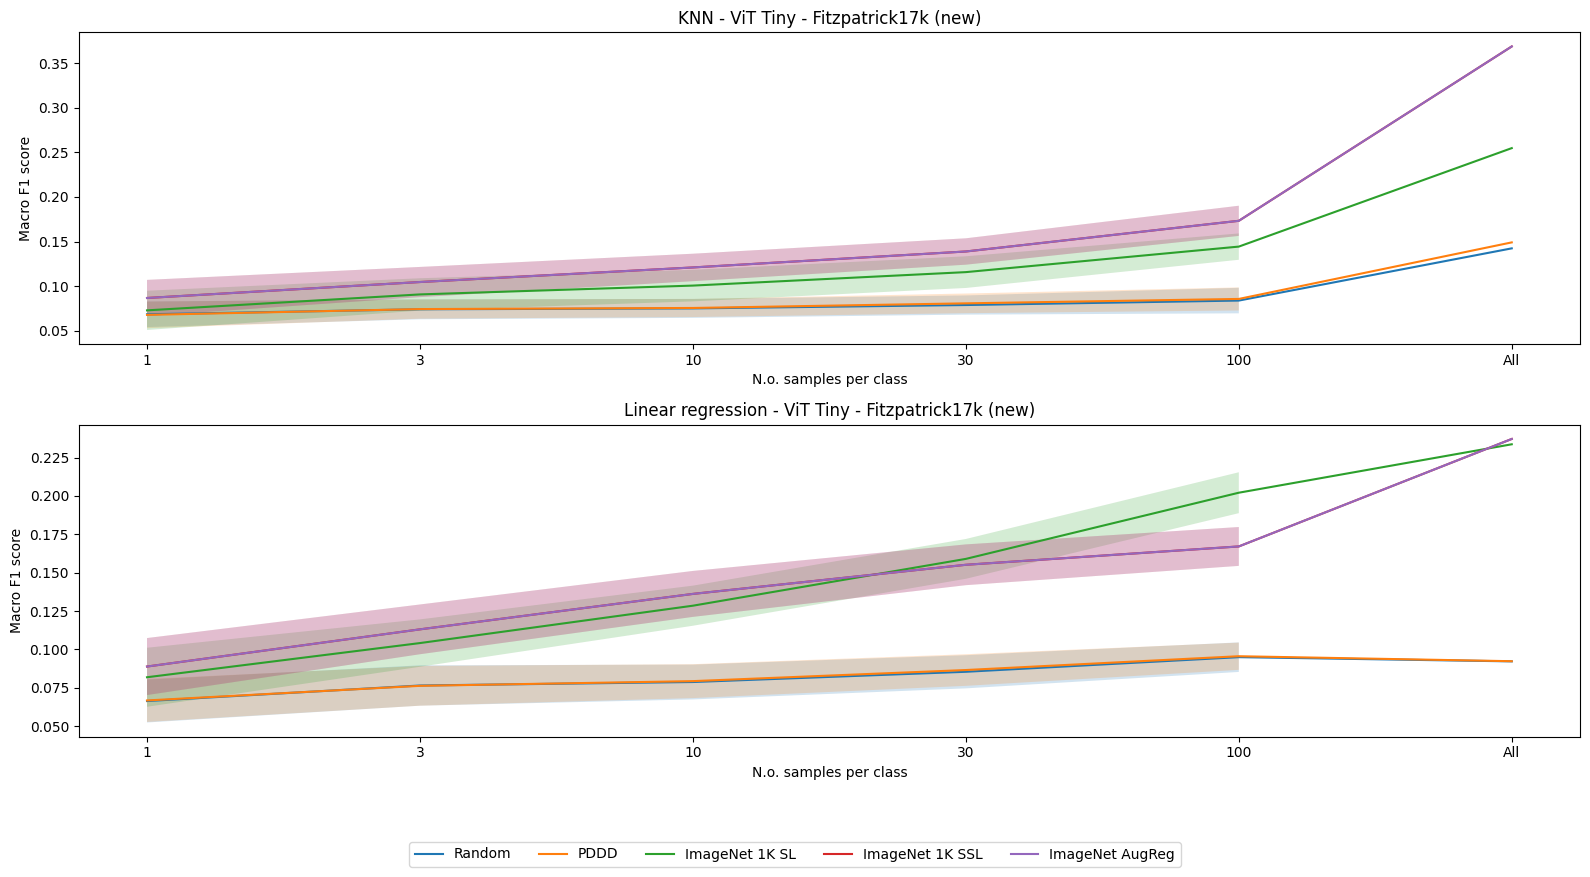

In [68]:
fig, ax = plt.subplots(
    len(architecture_configs) * len(model_configs),
    len(dataset_configs),
    figsize=(16, 8),
    squeeze=False,
)

for column, dataset_key in enumerate(dataset_configs):
    dataset = dataset_configs[dataset_key]
    df = load_pd(dataset)
    print(df["feature_identifier"].unique())

    distribution_check(model_configs, df["model_name"])
    distribution_check(dataset_configs, df["feature_identifier"])
    distribution_check(architecture_configs, df["feature_identifier"])
    distribution_check(aggregating_configs, df["feature_identifier"])

    df["number_of_samples"] = df["number_of_samples"].apply(number_to_string)
    # df_data = df[df["feature_identifier"].str.contains(dataset)]  # not necessary
    df_data = df

    for row_1, arch_key in enumerate(architecture_configs):
        architecture = architecture_configs[arch_key]
        df_arch = df_data[df_data["feature_identifier"].str.contains(architecture)]

        for label in aggregating_configs:
            df_agg = df_arch[
                df_arch["feature_identifier"].str.contains(aggregating_configs[label])
            ]

            for row_2, model_key in enumerate(model_configs):
                df_model = df_agg[
                    df_agg["model_name"].str.contains(model_configs[model_key])
                ]

                row = row_1 * len(model_configs) + row_2

                df_val = df_model.groupby(["number_of_samples"]).agg(
                    {"f1_macro": ["mean", "std"]}
                )
                df_val.columns = df_val.columns.droplevel(0)
                df_val = df_val.reset_index()
                df_val.set_index("number_of_samples", inplace=True)
                df_val = df_val.reindex(index=x_value_order)

                # print(model_key)
                # print(df_val["std"])

                ax[row][column].fill_between(
                    df_val.index,
                    df_val["mean"] - df_val["std"],
                    df_val["mean"] + df_val["std"],
                    alpha=0.2,
                )
                # ax[row][column].plot(df_val["mean"], linestyle='dashed',label=label) # ,label=[label]
                df_val.plot.line(
                    ax=ax[row][column],
                    y=["mean"],
                    # x=["number_of_samples"], NOTE: index is x-axis as default
                    label=[label],
                )

                # ax[row][column].set_ylim([0, 0.6])
                ax[row][column].set_title(f"{model_key} - {arch_key} - {dataset_key}")
                ax[row][column].set_ylabel(y_axis_title)
                ax[row][column].set_xlabel(x_axis_title)
                ax[row][column].get_legend().remove()
                # ax[row][column].set_xlim([xmin, xmax])
                # ax[row][column].set_ylim([0, 1])

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.tight_layout()
# fig.legend(lines, labels, loc='lower center', ncol=4)
fig.legend(
    lines, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=len(labels)
)
plt.show()

Read 5010 entries in Fitzpatrick_17k_3p-v1-ViT_T16-metrics.txt


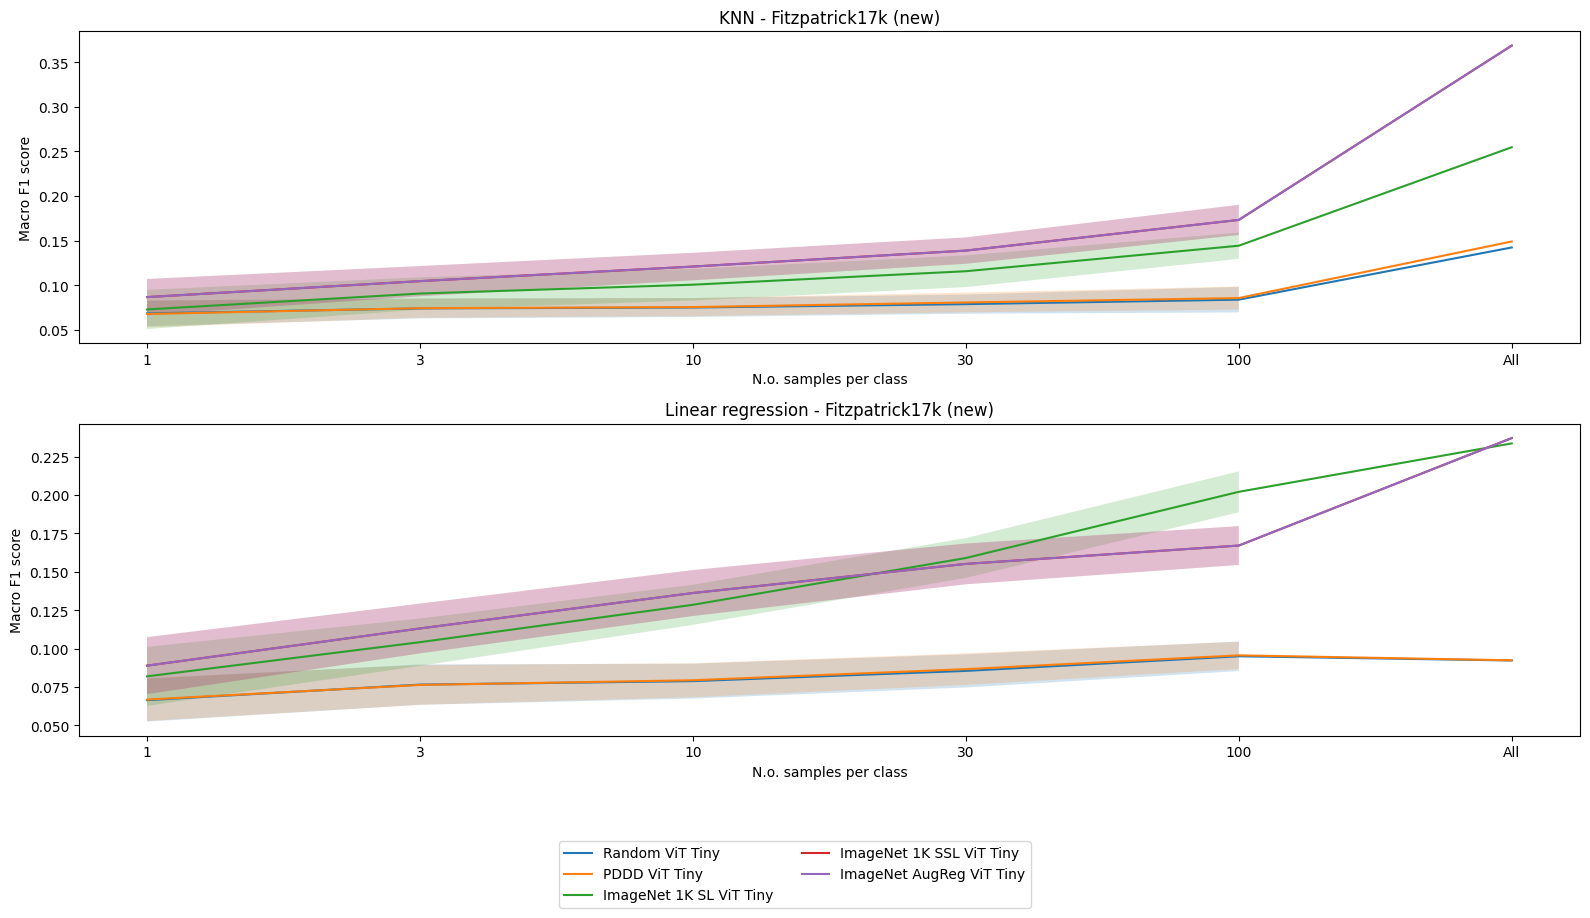

In [69]:
dataset_key = next(iter(dataset_configs)) # "HAM10000"

fig, ax = plt.subplots(
    len(model_configs),1,
    figsize=(16, 8),
    squeeze=False,
)
dataset = dataset_configs[dataset_key]
df = load_pd(dataset)

df["number_of_samples"] = df["number_of_samples"].apply(number_to_string)
df_data = df
column = 0
for row_1, arch_key in enumerate(architecture_configs):
    # print(arch_key)
    architecture = architecture_configs[arch_key]
    df_arch = df_data[df_data["feature_identifier"].str.contains(architecture)]

    for label in aggregating_configs:
        # print(f"-{label}")
        df_agg = df_arch[
            df_arch["feature_identifier"].str.contains(aggregating_configs[label])
        ]

        for row_2, model_key in enumerate(model_configs):
            # print(f"--{model_key}")
            df_model = df_agg[
                df_agg["model_name"].str.contains(model_configs[model_key])
            ]
            
            row = row_2

            df_val = df_model.groupby(["number_of_samples"]).agg(
                {"f1_macro": ["mean", "std"]}
            )
            df_val.columns = df_val.columns.droplevel(0)
            df_val = df_val.reset_index()
            df_val.set_index("number_of_samples", inplace=True)
            df_val = df_val.reindex(index=x_value_order)

            ax[row][column].fill_between(
                df_val.index,
                df_val["mean"] - df_val["std"],
                df_val["mean"] + df_val["std"],
                alpha=0.2,
            )

            df_val.plot.line(
                ax=ax[row][column],
                y=["mean"],
                label=[label+" "+arch_key],
            )

            ax[row][column].set_title(f"{model_key} - {dataset_key}")
            ax[row][column].set_ylabel(y_axis_title)
            ax[row][column].set_xlabel(x_axis_title)
            ax[row][column].get_legend().remove()



lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.tight_layout()
fig.legend(
    lines, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2 # len(labels)
)
plt.show()

Min: 1.0
Max: 100.0


<Axes: ylabel='Frequency'>

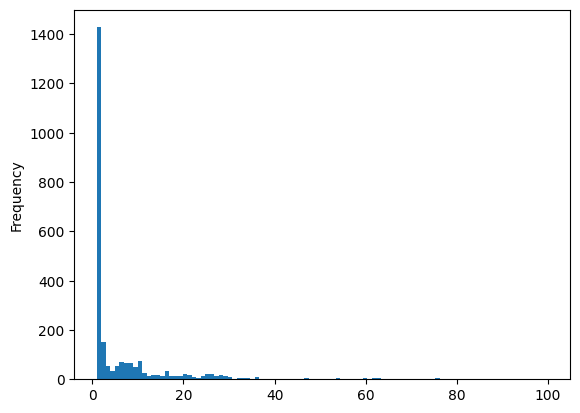

In [70]:
df_knn = df[df["model_name"] == "knn"]

print("Min: " + str(df_knn["best_k"].min()))
print("Max: " + str(df_knn["best_k"].max()))
df_knn["best_k"].plot.hist(bins=100)

# NOTE: Do not put this graphic into the report, because it is highly biased and could confuse readers

In [71]:
# # ResNet Random_19 (K=1): 0.07036247334754797
# # ResNet Random_20 (K=1): 0.053304904051172705
# # ResNet Random_21 (K=1): 0.07462686567164178
# # ResNet ImageNet_v1 (K=1): 0.15565031982942432
# # ResNet ImageNet_v2 (K=1): 0.10660980810234541
# # ResNet PDDD (K=1): 0.18976545842217485

# # Swin_T Random_19 (K=1): 0.06823027718550106
# # Swin_T Random_20 (K=1): 0.0767590618336887
# # Swin_T Random_21 (K=1): 0.05543710021321962
# # Swin_T ImageNet (K=1): 0.39872068230277186
# # Swin_T PDDD (K=1): 0.2579957356076759

# # ResNet Random_19: 0.0021321961620469083
# # ResNet Random_20: 0.01279317697228145
# # ResNet Random_21: 0.008528784648187633 ???
# # ResNet ImageNet_v1: 0.008528784648187633 ???
# # ResNet ImageNet_v2: 0.07889125799573561
# # ResNet PDDD: 0.14285714285714285

# # Swin_T Random_19: 0.1023454157782516
# # Swin_T Random_20: 0.10660980810234541
# # Swin_T Random_21: 0.12366737739872068
# # Swin_T ImageNet: 0.5778251599147122
# # Swin_T PDDD: 0.3411513859275053

# x_values_random = [
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "KNN Swin-T",
#     "KNN Swin-T",
#     "LogReg Swin-T",
#     "LogReg Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_random = [
#     0.07036247334754797,
#     0.053304904051172705,
#     0.07462686567164178,
#     0.0021321961620469083,
#     0.01279317697228145,
#     0.008528784648187633,
#     0.06823027718550106,
#     0.0767590618336887,
#     0.05543710021321962,
#     0.1023454157782516,
#     0.10660980810234541,
#     0.12366737739872068,
# ]
# x_values_imagenet = [
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_imagenet = [
#     0.15565031982942432,
#     0.10660980810234541,
#     0.008528784648187633,
#     0.07889125799573561,
#     0.39872068230277186,
#     0.5778251599147122,
# ]
# x_values_pddd = [
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_pddd = [
#     0.18976545842217485,
#     0.14285714285714285,
#     0.2579957356076759,
#     0.3411513859275053,
# ]

In [72]:
# plt.scatter(x_values_random, y_values_random)
# plt.scatter(x_values_imagenet, y_values_imagenet)
# plt.scatter(x_values_pddd, y_values_pddd)
# plt.gca().set_ylabel("Accuracy")  # gca = get current axes
# plt.legend(["Random", "ImageNet", "PDDD"])
# plt.title("PlantDoc comparison")
# plt.show()

In [73]:
# x_values_random = [
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "KNN Swin-T",
#     "KNN Swin-T",
#     "LogReg Swin-T",
#     "LogReg Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_random = [
#     0.446064139941691,
#     0.43440233236151604,
#     0.43440233236151604,
#     0.2944606413994169,
#     0.32653061224489793,
#     0.40233236151603496,
#     0.45481049562682213,
#     0.36151603498542273,
#     0.40233236151603496,
#     0.5451895043731778,
#     0.4752186588921283,
#     0.4956268221574344,
# ]
# x_values_imagenet = [
#     "KNN ResNet50",
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_imagenet = [
#     0.5714285714285714,
#     0.565597667638484,
#     0.2565597667638484,
#     0.4897959183673469,
#     0.5830903790087464,
#     0.7346938775510204,
# ]
# x_values_pddd = [
#     "KNN ResNet50",
#     "LogReg ResNet50",
#     "KNN Swin-T",
#     "LogReg Swin-T",
# ]
# y_values_pddd = [
#     0.4752186588921283,
#     0.42565597667638483,
#     0.6122448979591837,
#     0.6384839650145773,
# ]

In [74]:
# plt.scatter(x_values_random, y_values_random)
# plt.scatter(x_values_imagenet, y_values_imagenet)
# plt.scatter(x_values_pddd, y_values_pddd)
# plt.gca().set_ylabel("Accuracy")  # gca = get current axes
# plt.legend(["Random", "ImageNet", "PDDD"])
# plt.title("Cassava comparison")
# plt.show()